This notebook aims to provide a gentle introduction of Shannon's entropy and mutual information.

**Please do not distribute this material without consent of the author.
@Copyright 2025
Peishi Jiang**

# What is information theory?
Information theory is a mathematical method to quantify the nonlinear dependencies in a multivariate system. It originates from electronic engineering to study the storage, quantification, and communication of information. Claude Shannon pioneered this field and proposed the concept of Shannon's entropy in the 1940s. Since then, this mathematical branch has gone through great development and applications in various field, including but not limited to, electronic engineering, mathematics, computer science, phyics, neurobiology, and earth science/hydrology.


# Entropy
We use Shannon's entropy here, denoted of $H$. Given a variable $X$, $H$ quantifies the overall uncertainty (or variability) of $X$ as:
\begin{align}
 H(X) &= - \sum_{x \in X} p(x) \log(p(x)) \tag{1},
\end{align}
where $p(x)$ is the discretized probability of the realization of $X=x$.

For two variables $X$ and $Y$, their overall uncertainty can be calculated through the joint entropy as below:
\begin{align}
 H(X,Y) &= - \sum_{x \in X} \sum_{y \in Y} p(x,y) \log(p(x,y)) \tag{2}.
\end{align}

## Entropy's properties
Shannon's entropy has the following nice properties (**Prove them!**):
1. Nonnegativity: $H \geq 0$. In other words, the entropy is always nonnegative.
2. Chain rule: $H(X,Y) = H(X) + H(Y|X)$, where $H(Y|X)=-\sum_{x \in X} \sum_{y \in Y} p(x,y) \log(p(y|x))$ is the conditional entropy. This property states that the joint uncertainty of $X$ and $Y$ is the sum of $X$'s uncertainty ($H(X)$) and the remaining uncertainty of $Y$ given the knowledge of $X$ ($H(Y|X)$).
3. $H(X|Y) \leq H(X)$.

## Maximum and minimum entropy (univariate case)
Now, let's move onto the calculation of the entropy $H$ and see under what conditions it reaches maximum/minimum.

OK, say a variable $X$ has two states $X=a$ and $X=b$, with probabilities $P(X=a)$ and $P(X=b)$, respectively, such that $P(X=a) + P(X=b) = 1$. Instead of mannually calculating it (which you can!), we are going to use Python programming to compute it.

Let's first define a function to calculate the entropy --

In [10]:
import numpy as np
def computeEntropy(pdf, dims=None, base=np.e):
    """
    Compute the entropy along dims
    pdf: probability mass distribution with shape (Nx, Ny, Nz, ...)
    dims: the dimension indices
    """
    shape = pdf.shape
    
    # Get the number of variables/dimensions
    D = len(shape)

    # Get the indices of all dimensions/variabiels
    all_dims  = set(range(D))

    # Compute the marginal PDF
    if dims is None:
        pdf_dim = pdf
    elif all_dims == set(dims):
        pdf_dim = pdf
    else:
        pdf_dim = pdf.sum(axis=tuple(all_dims-set(dims)))

    # Compute the entropy
    log_pdf_dim = np.ma.filled(np.log(np.ma.masked_equal(pdf_dim, 0)), 0)
    return -np.sum(pdf*log_pdf_dim / np.log(base))

# def computeEntropy(pdf, base=np.e):
#     """
#     Compute the entropy based on pdf
#     pdf: a numpy array of probability such that sum(pdf)=1
#     base: the logarithm base
#     """
#     log_pdf = np.ma.filled(np.log(np.ma.masked_equal(pdf, 0)), 0)
#     return -np.sum(pdf*log_pdf / np.log(base))


Scenario 1: X is determinant such that $P(X=a)=1$ and $P(X=b)=0$. What is $H(X)$?

In [12]:
P1 = np.array([1, 0])
H1 = computeEntropy(P1)
print(f"H1: {H1} nats")

H1: -0.0 nats


/var/folders/b7/q6wyxw8x1_s5rh1mqvfb8vsr0000gn/T/ipykernel_19027/1805999971.py:25: RuntimeWarning: divide by zero encountered in log
  log_pdf_dim = np.ma.filled(np.log(np.ma.masked_equal(pdf_dim, 0)), 0)


$H(X) = 0$ ! This means there is no variability or uncertainty associated with $X$, which totally makes sense since $X$ is deterministic. Let's consider two additional scenarios:

Scenario 2: $P(X=a)=0.1$ and $P(X=b)=0.9$

Scenario 3: $P(X=a)=0.5$ and $P(X=b)=0.5$

In [13]:
P2, P3 = np.array([0.1, 0.9]), np.array([0.5, 0.5])
H2 = computeEntropy(P2)
H3 = computeEntropy(P3)
print(f"H2: {H2} nats")
print(f"H3: {H3} nats")

H2: 0.3250829733914482 nats
H3: 0.6931471805599453 nats


Why does $H2 < H3$? 

Intuitively, this is because scenario 2 is more deterministic than scenario 3 since there is a much higher chance that $X=b$. On the other hand, scenario 3 gives equal probability to $X=a$ and $X=b$.

In fact, one can prove that the entropy is maximized when the distribution follows a uniform distribution! Note that scenario 3 is exactly a discretized uniform distribution with only two realizations. In a generalized discrete uniform distribution with $N$ realizations, $H = \log(\frac{1}{N})$.

## Maximum and minimum entropy (bivariate case)
The same philosophy is applicable to a bivariate case.

Now consider another variable $Y$ that takes on values $c$ and $d$. 

Scenario 4: The joint probabilty of $X$ and $Y$ are given by:
\begin{align}
 P(X=a,Y=c) &= 0.1 \notag\\
 P(X=b,Y=c) &= 0.2 \notag\\
 P(X=a,Y=d) &= 0.3 \notag\\
 P(X=b,Y=d) &= 0.4. \notag
\end{align}

Their joint entropy is --

In [21]:
P4 = np.array([[0.1, 0.2], [0.3, 0.4]])
H4 = computeEntropy(P4)
print(f"H4: {H4} nats")

H4: 1.2798542258336676 nats


Scenario 5: What if it follows uniform distribution? We are expecting that the joint entropy would be larger than $H4$.

In [22]:
P5 = np.array([[0.25, 0.25], [0.25, 0.25]])
H5 = computeEntropy(P5)
print(f"H5: {H5} nats")

H5: 1.3862943611198906 nats


## What's the units of entropy?
It depends on what base is used in the log! If it is a natural base (as what has been used in the previous cases), the units is "nats". If the base adopts 2, the units is "bits"!

Now, let's revisit the three scenarios.


In [16]:
base = 2.
H1 = computeEntropy(P1, base=2)
H2 = computeEntropy(P2, base=2)
H3 = computeEntropy(P3, base=2)
print(f"H1: {H1} bits")
print(f"H2: {H2} bits")
print(f"H3: {H3} bits")

H1: -0.0 bits
H2: 0.4689955935892812 bits
H3: 1.0 bits


/var/folders/b7/q6wyxw8x1_s5rh1mqvfb8vsr0000gn/T/ipykernel_19027/1805999971.py:25: RuntimeWarning: divide by zero encountered in log
  log_pdf_dim = np.ma.filled(np.log(np.ma.masked_equal(pdf_dim, 0)), 0)


Now, the results are different. Sometimes, bits are more intuitive for binary cases. Here, $H_3=1$ since $\log_2(1/2) = 1$.

## Differential entropy

We have covered Shannon's entropy applied to the discretized probability space. What about continuous probability distribution? Well, this is where differential entropy is applied (denoted as lower case $h$):
\begin{align}
 h(X) &= - \int_{x \in X} f(x) \log(f(x)) \mathrm{d}x\tag{3},
\end{align}
where $f$ is the probability density function of $X$.

Differential entropy is very useful when the functional form of $f$ is given and the analytical solutions of $h$ can be derived. Take the uniform distribution that are defined over $[a, b]$ as an example. The corresponding $h$ can be derived as:
\begin{align}
 h(X) = \log(b-a)\tag{4}.
\end{align}

For Gaussian distribution $f(x) = \frac{1}{\sqrt{2\pi \sigma^2}}e^{\frac{-x^2}{2\sigma^2}}$, the corresponding $h$ is given as:
\begin{align}
 h(X) = \frac{1}{2}\log(2\pi e \sigma^2)\tag{5}.
\end{align}

**Note that differential entropy can be negative!**

# Mutual information

Consider two random variables $X$ and $Y$ with a joint probability distribution $p(x,y)$. The mutual information $I(X;Y)$ quantifies the shared information or uncertainty between $X$ and $Y$, and it is given by:
\begin{align}
 I(X;Y) &= \sum_{x \in X} \sum_{y \in Y} p(x,y) \log(\frac{p(x,y)}{p(x)p(y)})\tag{6}.
\end{align}


## Mutual information's properties

While it might be a bit abstract at the first glance, Eq.(6) can in fact be converted into:
\begin{align}
 I(X;Y) &= H(Y) - H(Y|X)\tag{7a} \\
        &= H(X) - H(X|Y)\tag{7b} \\
        &= H(X) + H(Y) - H(X,Y)\tag{7c}
\end{align}
The above equations describes that $I(X;Y)$ is the difference between the entropy of one variable and the remaining uncertainty of this variable given the knowledge of the other other. As a result, $I(X;Y)$ is a symmetric metric, such that $I(X;Y)=I(Y;X)$.

**Properties of $I(X;Y)$**:
1. $I(X;Y) = H(Y) - H(Y|X) = H(X) - H(X|Y) = H(X) + H(Y) - H(X,Y)$.
2. $I(X;Y) = 0$ when $X$ and $Y$ are independent such that $P(X,Y) = P(X)P(Y)$.

Let's define a function that calculates $I(X;Y)$.


In [23]:
def computeMI(pdf, dims1, dims2, base=np.e):
    """
    Compute the mutual information given two sets of dimensions
    dims1 -- the first dimension indices
    dims2 -- the second dimension indices
    normalized -- whether to normalize the mutual information through dividing it by the output entropy
    """
    # Compute the entropies
    h12 = computeEntropy(pdf, dims1+dims2, base)
    h1  = computeEntropy(pdf, dims1, base)
    h2  = computeEntropy(pdf, dims2, base)

    # Compute the mutual information
    return h1 + h2 - h12


Let's revisit scenarios 4 and 5. What are the mutual information of $X$ and $Y$ for the two cases? Which is larger?

In [24]:
I1 = computeMI(P4, dims1=[0], dims2=[1])
I2 = computeMI(P5, dims1=[0], dims2=[1])

print(f"I1: {I1} nats")
print(f"I2: {I2} nats")

I1: 0.08875152926920249 nats
I2: 0.0 nats


Why is $I2$ (scenario 5) zero? This is because $X$ and $Y$ are independent in this uniform distribution! So, the second property of $I(X;Y)$ holds.

## Mutual information for differential entropy
The mutual information $I(X;Y)$ between two random variables with joint density $f(x,y)$ is defined as:
\begin{align}
 I(X;Y) = \int_{x\in X} \int_{y \in Y} f(x,y) \log\frac{f(x,y)}{f(x)f(y)}\mathrm{d}x\mathrm{d}y\tag{8}
\end{align}

Let $(X,Y) \sim \mathcal{N}(0,K)$, where
\begin{align}
 K = \begin{bmatrix} \sigma^2 & \rho \sigma^2 \\ \rho \sigma^2 & \sigma^2 \end{bmatrix}\notag.
\end{align}

We can show that
\begin{align}
 I(X;Y) = -\frac{1}{2}\log(1-\sigma^2)\tag{9}
\end{align}

# Real world application

Now let's use entropy and mutual information to analyze ecosystem dynamics!

## Flux tower data at US-Bi1

We will analyze the time series of multivariate ecosystem states captured by integrated flux tower system at [US-Bi1](https://ameriflux.lbl.gov/sites/siteinfo/US-Bi1). This is an agricultural field in the San Joaquin Sacramento Delta. The field is a mix of organic peat and sediments and minerals from old river channels.

I have already extracted the time series of a few key variables, including: TA (air temperature [C]), SW_IN (solar radiation [W m-2]), VPD (vapor pressure deficit [kPa]), WS (wind speed [m s-1]), CO2 (ambient CO2 concentration [m3 m-3]), PA (air pressure [hPa]), USTAR (friction velocity [m s-1]), TS (soil temperature [C]), SWC (volumetric soil water content [m3 m-3]), P [precipitation [mm]], H (sensible heat flux [W m-2]), NETRAD (net radiation [W m-2]), G (ground heat flux [W m-2]), and NEE (net ecosystem exchange [$\mu$ molCO2 m-2 s-1]).

**Note that although we are analyzing time series data, information theory is applicable to any probability space!**

In [4]:
import pandas as pd
f = "../data/US-Bi1/US-Bi1-sub.csv"
df = pd.read_csv(f, index_col=0)
df.index = pd.to_datetime(df.index, format="%Y-%m-%d")
df.head()

,TA,SW_IN,VPD,WS,CO2,PA,USTAR,TS,SWC,P,LE,H,NETRAD,G,NEE
TIMESTAMP,,,,,,,,,,,,,,,
2018-07-01,16.821,367.768,10.007,5.713,403.310,101.100,0.475328,27.953,7.442,0.0,79.4606,61.9275,181.691565,9.15793,-0.432516
2018-07-02,13.732,305.375,6.535,4.551,401.683,101.066,0.389481,26.892,7.251,0.0,61.9552,55.5644,144.393014,3.54177,-1.418830
2018-07-03,13.603,350.836,7.043,3.436,403.550,100.883,0.298883,26.422,7.275,0.0,74.4182,59.7060,170.780461,6.67214,-2.146550
2018-07-04,12.098,365.762,5.742,3.206,399.637,101.348,0.286625,26.282,7.226,0.0,75.3749,73.4782,183.257454,3.74034,-2.997150
2018-07-05,15.040,366.866,10.016,1.915,404.071,101.820,0.170882,26.166,7.265,0.0,105.3130,40.8707,191.842414,7.78708,-2.804670


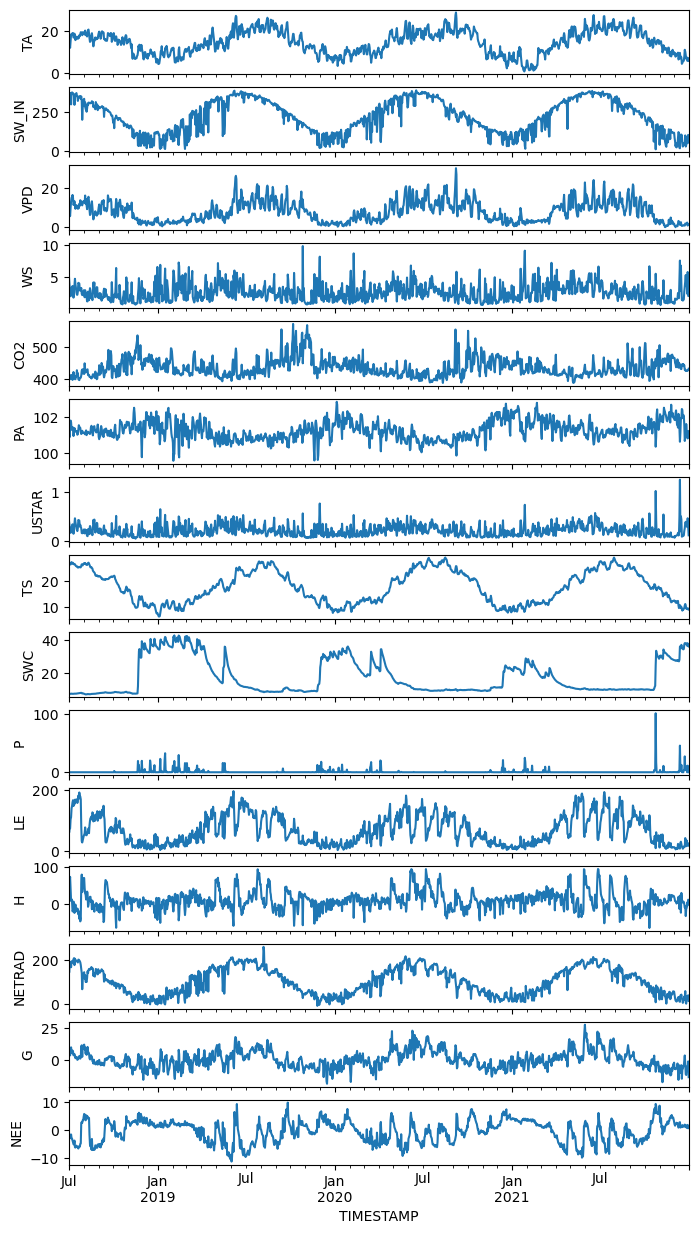

In [7]:
import matplotlib.pyplot as plt
varns = df.columns
fig, axes = plt.subplots(len(varns), 1, figsize=(8, 1*len(varns)), sharex=True)
for i, varn in enumerate(varns):
    ax = axes[i]
    df[varn].plot(ax=ax)
    ax.set(ylabel=varn)

## Probability estimation: the binning method

The key to calculate the information theoretic metrics (e.g., entropy and mutual information) is to get the correct probability from data points, which is always an ongoing and a hot topic in data science. There are numerous ways, including but not limited to, binning or histograms method, kernel density method, k-nearest-neighbor method, and neural network method. Here, **I'd like to introduce the most basic method: the binning method, or called histogram**. This method divides the datapoints into discrete bins and counting the number of observations within each bin to estimate the underlying probability density function (PDF). This method is very simple and intuitive to visualize and analyze data distribution.

Let's take the air temperature (TA) for example. We evenly divide the whole range (i.e., the min and max of TA) into 10 bins. We use numpy histogramdd function to calculate the histogram.

In [15]:
data = df['TA'].values
hist, edges = np.histogramdd(data, bins=10)
print(f"The number of datapoints in each of the 10 bins: {hist}")

The number of datapoints in each of the 10 bins: [ 29.  66. 167. 193. 183. 204. 212. 154.  62.  10.]


In [18]:
# Therefore, we can get the probability of each bin by normalizing the histogram
p = hist / hist.sum()
print(f"The probability in each of the 10 bins: {p}")

The probability in each of the 10 bins: [0.02265625 0.0515625  0.13046875 0.15078125 0.14296875 0.159375
 0.165625   0.1203125  0.0484375  0.0078125 ]


[Text(0.5, 0, 'TA [C]'), Text(0, 0.5, 'Probability [-]')]

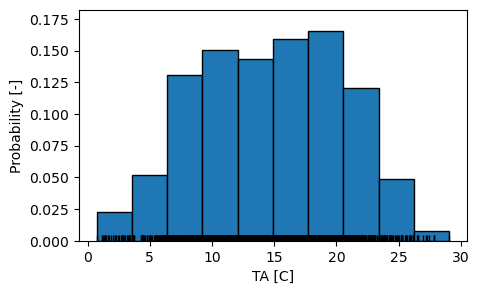

In [22]:
# Now, let's plot the probability
import seaborn as sns
bin_centers = 0.5 * (edges[0][1:] + edges[0][:-1])
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

# Histogram
ax.bar(bin_centers, p, width=np.diff(edges[0]), align='center', edgecolor='black')

# Rugplot (data points at the background)
sns.rugplot(data, color='black', ax=ax)

ax.set(xlabel='TA [C]', ylabel='Probability [-]')


OK, let's look at the 2D case. Consider both air temperature (TA) and soil moisture (SWC). We'd like to calculate its joint probability. Again, assume 10 bins along each dimension and we have 100 bins in total in this two dimensional space!

In [ ]:
data2 = df[['TA','SWC']].values
hist2, edges2 = np.histogramdd(data2, bins=[10,10]) # histgram
p2 = hist2 / hist2.sum() # probability


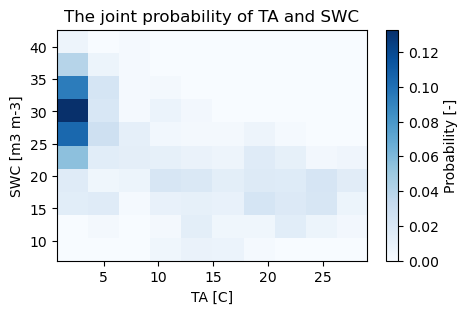

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
im = ax.imshow(p2, origin='lower',
           extent=[edges2[0][0], edges2[0][-1], edges2[1][0], edges2[1][-1]],
           aspect='auto', cmap='Blues')
fig.colorbar(im, ax=ax, label='Probability [-]')
ax.set(xlabel='TA [C]', ylabel='SWC [m3 m-3]', title='The joint probability of TA and SWC');


## Define a Python class to calculate both entropy and mutual information
Now, since both entropy and mutual informaiton can be calculated from a two dimensional probability space, it's better to have a unified structure to 'lump' them as a whole. To that, I'm going to use Python class that supports [object-oriented programming](https://en.wikipedia.org/wiki/Object-oriented_programming).

In [38]:
class info(object):

    def __init__(self, data, bins, ranges=None, weights=None):
        """
        data -- the data to be histogrammed [numpy (N, D) array]
        bins -- the bin specification [sequence or int, optional]:
                (1) a sequence of arrays describing the monotonically increasing bin 
                    edges along each dimension.
                (2) the number of bins for each dimension (nx, ny, … =bins)
                (3) the number of bins for all dimensions (nx=ny=…=bins)
        range -- A sequence of length D, each an optional (lower, upper) tuple giving 
                 the outer bin edges to be used if the edges are not given explicitly 
                 in bins. An entry of None in the sequence results in the minimum and 
                 maximum values being used for the corresponding dimension. The default, 
                 None, is equivalent to passing a tuple of D None values.
        weights -- An array of values w_i weighing each sample (x_i, y_i, z_i, …).
        """
        self.data   = data
        self.bins   = bins
        self.ranges = ranges
        
        # Remove any nan sample
        data = data[~np.isnan(data).any(axis=1)]

        # N: number of datapoints
        # D: number of dimensions
        self.N, self.D = data.shape

        # Count the histogram density
        self.pdf, self.edges = np.histogramdd(data, bins=bins, range=ranges, 
                                              weights=weights, density=False)
        self.pdf = self.pdf / self.pdf.sum()

    def computeEntropy(self, dims, base=np.e):
        """
        Compute the entropy along dims
        dims -- the dimension indices
        """
        # bins = self.bins
        N, D = self.N, self.D

        # Get the number of bins along each dimension in dims
        all_dims  = set(range(D))

        # Compute the marginal PDF
        if all_dims == set(dims):
            pdf_dim = self.pdf
        else:
            pdf_dim = self.pdf.sum(axis=tuple(all_dims-set(dims)))

        # Compute the entropy
        log_pdf_dim = np.ma.filled(np.log(np.ma.masked_equal(pdf_dim, 0)), 0)
        ent = -np.sum(pdf_dim*log_pdf_dim/np.log(base))
        return ent
    
    def computeMI(self, dims1, dims2, base=np.e):
        """
        Compute the mutual information given two sets of dimensions
        dims1 -- the first dimension indices
        dims2 -- the second dimension indices
        """
        # Compute the entropies
        h12 = self.computeEntropy(dims1+dims2, base=base)
        h1  = self.computeEntropy(dims1, base=base)
        h2  = self.computeEntropy(dims2, base=base)

        # Compute the mutual information
        # I(X1;X2) = H(X1) + H(X2) - H(X1,X2)
        mi = h1 + h2 - h12
        return mi

## Quantify univariate variability using entropy


In [40]:
info_instance = info(data2, bins=[10, 10])
H_TA = info_instance.computeEntropy(dims=[0])
H_SWC = info_instance.computeEntropy(dims=[1])

In [41]:
print(f"The entropy of TA: {H_TA} nats")
print(f"The entropy of SWC: {H_SWC} nats")

The entropy of TA: 2.0975836509021826 nats
The entropy of SWC: 1.8372494425176353 nats


## Quantify shared information using mutual information

In [42]:
I = info_instance.computeMI(dims1=[0], dims2=[1])
print(f"The mutual information between TA and SWC: {I} nats")

The mutual information between TA and SWC: 0.40491690808518976 nats


/var/folders/b7/q6wyxw8x1_s5rh1mqvfb8vsr0000gn/T/ipykernel_6639/3274480760.py:52: RuntimeWarning: divide by zero encountered in log
  log_pdf_dim = np.ma.filled(np.log(np.ma.masked_equal(pdf_dim, 0)), 0)


The mutual information between TA and SWC is pretty high! It acounts for about 19% and 22% of the total variability of TA and SWC, respectively, calculated by $\frac{H}{I}$. In other words, TA and SWC are highly dependent with each other. This is because high TA usually corresponds to drought condition which leads to low SWC, and vice versa.

# Homework

## Entropy

**Ex1**: Given a variable $X_2$ that has four states $a,b,c,$ and $d$, what is its entropy if their probabilities are $P(X=a)=0$, $P(X=b)=0$, $P(X=c)=0$, and $P(X=d)=1$? Please use the natural number as the base.

**Ex2**: In **Ex1**, if their probability follows discretized uniform distribution, what is its entropy? Does it equal to $H_3$ in scenario 3? If not, why?

**Ex3**: Given two variables $X_3$ and $X_4$, each of which takes on five different realizations/values. Suppose their joint probability follows a discretized uniform distribution, what is the corresponding joint entropy?

**Ex4**: Please prove the chain rule of the entropy $H(X,Y) = H(X) + H(Y|X)$.

**Ex5**: Please prove Eq.(5) that $h(X) = \frac{1}{2}\log(2\pi e \sigma^2)$ when $f(x) = \frac{1}{\sqrt{2\pi \sigma^2}}e^{\frac{-x^2}{2\sigma^2}}$.

**Ex6**: In the flux tower data example, please calculate the entropy of all the variables. Use 10 bins for each variable. Tell me what you find.

**Ex7**: Redo **Ex6**. But this time, use 5, 15, 20, 30, and 1000 bins for each variable. Are the calculated entropy still the same? If not, how do they change? And why do they change?

## Mutual information

**Ex8**: Prove $I(X;Y) = H(Y) - H(Y|X)$ in Eq.(7a).

**Ex9**: Prove $I(X;Y) = H(X) + H(Y) - H(X,Y)$ in Eq.(7c).

**Ex10**: Prove $I(X;Y) = 0$ when $X$ and $Y$ are independent such that $P(X,Y) = P(X)P(Y)$.

**Ex11**: Please write a function to calculate the conditional entropy $H(X|Y)$ and compute $H(X|Y)$ for the joint probability used in scenario 4.

**Ex12**: Prove $I(X;Y) = -\frac{1}{2}\log(1-\sigma^2)$ under bivariate normal distribution in Eq.(9).

**Ex13**: In the flux tower application, calculate the mutual information between each pair of variables and plot this matrix of mutual information in a heatmap. Use 10 bins for each variable. Tell me what you learn from the result.

# Further reading
- Shannon, C. E. (1948). A mathematical theory of communication. The Bell system technical journal, 27(3), 379-423.
- Cover, T., & Thomas, J. (2006). Chapter 2: Entropy, Relative Entropy, and Mutual Information. Elements of information theory (2nd., Vol. 2). New York: Wiley.
- Cover, T., & Thomas, J. (2006). Chapter 8: Differential Entropy. Elements of information theory (2nd., Vol. 2). New York: Wiley.
- Gong, W., Yang, D., Gupta, H. V., & Nearing, G. (2014). Estimating information entropy for hydrological data: One‐dimensional case. Water Resources Research, 50(6), 5003-5018.